### Dataset downloaded from kaggle

#### https://www.kaggle.com/datasets/knightbearr/sales-product-data?resource=download

### Import libraries

In [749]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar 
from itertools import combinations
from collections import Counter
import os
import glob
sns.set()

### Read the files

In [750]:
# Read the CSVs file
df = pd.read_csv('./data/Sales_April_2019.csv')
df.head()
df['Price Each'].value_counts()

14.95         2201
11.95         2079
3.84          2063
2.99          1989
11.99         1890
150           1515
99.99         1280
149.99         734
700            693
379.99         650
600            581
389.99         563
300            458
1700           453
999.99         392
109.99         390
400            220
600.0          138
Price Each      35
Name: Price Each, dtype: int64

In [751]:
# Get CSV files list from a folder
path = './data'
csv_files = glob.glob(path + "/*.csv")
# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)
# Concatenate all DataFrames
all_data   = pd.concat(df_list, ignore_index = True)
all_data.to_csv('all_data.csv', index=False)

In [752]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [753]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Cleaning up the data

#### Checking for null


In [754]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [755]:
# We have 545 null values
# Drop rows from  with missing values  in columns
all_data = all_data.dropna()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [756]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [757]:
#Values count
all_data['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [758]:
# Drop of rows where the rows 'Quantity Ordered' are string
all_data =all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']
all_data = all_data[all_data['Price Each']!= 'Price Each'] 

In [759]:
all_data['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [760]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convering the data to correct type

In [762]:
# Convert 'Quantity Ordered', 'Price Each' to numeric type
#all_data[['Quantity Ordered','Price Each']]=  all_data[['Quantity Ordered','Price Each']].apply(pd.to_numeric)
all_data['Order ID'] =all_data['Order ID'].astype('string')
all_data['Quantity Ordered'] =all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] =all_data['Price Each'].astype('float')
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])



In [764]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  string        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(2), string(1)
memory usage: 9.2+ MB


#### Breaking out Address into Individual Columns (Address,City(State),  Zip Code )

In [765]:
# Get Address
def get_address(address):
    return address.split(",")[0].strip(" ")
all_data['Address'] = all_data['Purchase Address'].apply(lambda x: f"{get_address(x)}  ")

 # Get City(State)    
def get_city(address):
    return address.split(",")[1].strip(" ")
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

#Get Zip Code
def get_zipcode(address):
    return address.split(",")[2].split(" ")[2]
all_data['Zip Code'] = all_data['Purchase Address'].apply(lambda x: f"{get_zipcode(x)}  ")


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,Zip Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas (TX),75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston (MA),02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles (CA),90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles (CA),90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles (CA),90001


### Exploratory Data Analysis


#### What was the best month for sales? How much was earned that month?

In [766]:
# Add Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# Add month column 
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


In [767]:
# Best month for sales
Best_month = all_data[['Month','Sales']].groupby(['Month']).sum()
Best_month.sort_values(by=['Sales'], ascending=True )
Best_month

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


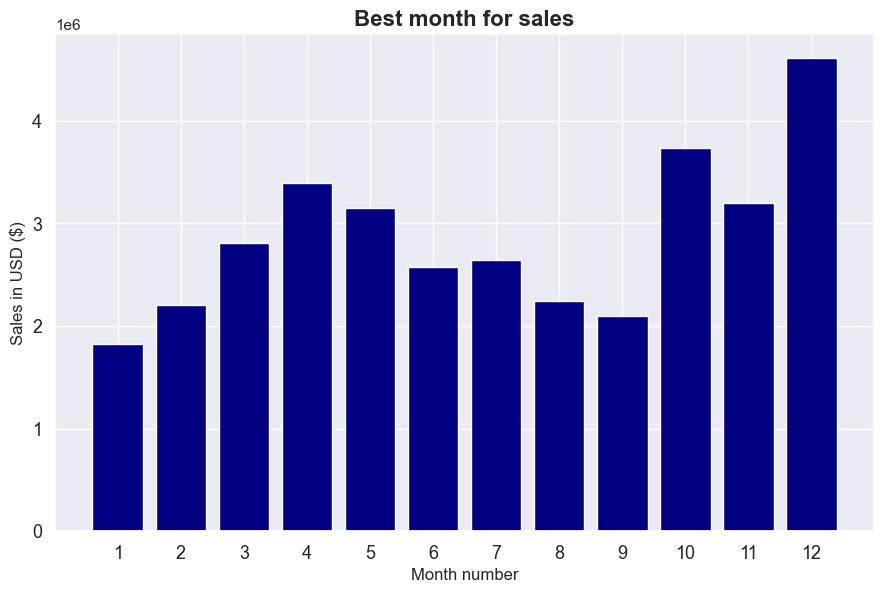

In [768]:
# Ploting sales vs months
plt.figure(figsize = (9, 6))
months=range(1,13)
plt.bar(x=months,height =Best_month['Sales'], color='Navy')
plt.xticks(months)
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.tight_layout()
plt.title("Best month for sales", fontsize = 16, fontweight = "bold", color ="midnightblue")
plt.savefig("best_moth_sales.png")
plt.show()


### What city with hihgest sales?

In [771]:
results =all_data[['City', 'Quantity Ordered', 'Price Each', 'Sales']].groupby(['City']).sum()

In [772]:
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


In [773]:
all_data_sorted =results.sort_values('Sales')

In [748]:
# cities = [city for city, df in all_data.groupby('City')]
# plt.bar(cities, results['Sales'])
# plt.ylabel('Sales in USD ($)')
# plt.xlabel('City name')
# plt.xticks(cities, rotation='vertical', size=8)
# plt.show()


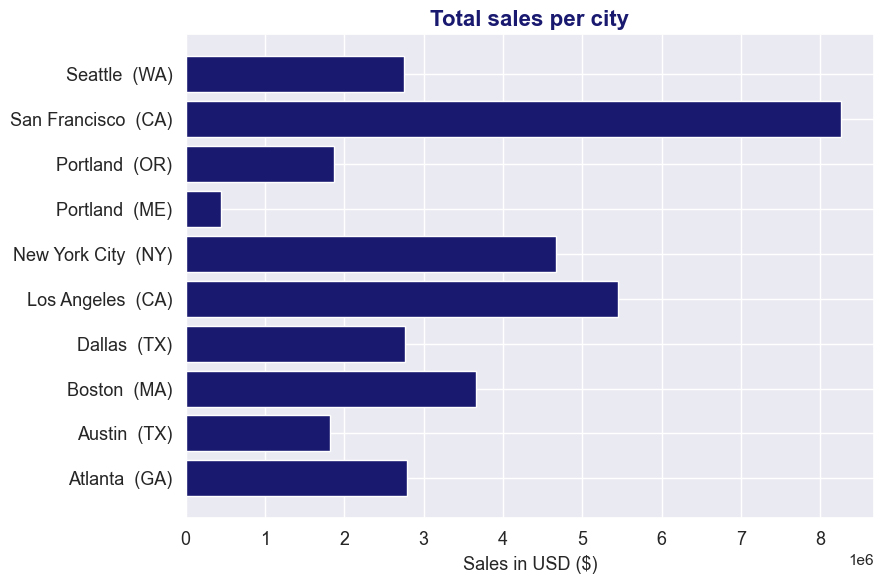

In [800]:
# The horizontal bar chart
plt.figure(figsize = (9, 6))
cities = [city for city, df in all_data.groupby('City')]
plt.barh(y = cities, #this is an inverted bar chart, so the first argument is the y axis
        width = results['Sales'], #the second argument shows the x-axis or is the width
        color = "midnightblue")
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Total sales per city", fontsize = 16, fontweight = "bold", color ="midnightblue")
plt.xlabel("Sales in USD ($)", fontsize = 13 )
plt.tight_layout()
plt.savefig("Hihgest_sales_cities.png")
plt.show()

### What are the Zip Code where people spendding more money


In [775]:
#Zip_city=['Zip Code','City']
results_Zip =all_data[['Zip Code',  'City' ,'Quantity Ordered', 'Price Each', 'Sales']].groupby(['Zip Code', 'City']).sum()

In [776]:
#all_data = all_data.drop('cit', axis=1)
results_Zip.sort_values(by=['Sales'], ascending=False)


,,Quantity Ordered,Price Each,Sales
Zip Code,City,,,
94016,San Francisco (CA),50239,8211461.74,8262203.91
90001,Los Angeles (CA),33289,5421435.23,5452570.80
10001,New York City (NY),27932,4635370.83,4664317.43
02215,Boston (MA),22528,3637409.77,3661642.01
30301,Atlanta (GA),16602,2779908.20,2795498.58
75001,Dallas (TX),16730,2752627.82,2767975.40
98101,Seattle (WA),16553,2733296.01,2747755.48
97035,Portland (OR),11303,1860558.22,1870732.34
73301,Austin (TX),11153,1809873.61,1819581.75


In [777]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,Zip Code,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas (TX),75001,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston (MA),02215,99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles (CA),90001,600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles (CA),90001,11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles (CA),90001,11.99,4


In [778]:
# What was the  most expensive order  from 
Expeensive_order =all_data.groupby(['Order ID','City', 'Sales','Order Date', 'Product']).sum()
Expeensive_order= Expeensive_order.sort_values(by=['Sales'], ascending=False)
Expeensive_order

,,,,,Quantity Ordered,Price Each,Month
Order ID,City,Sales,Order Date,Product,,,
181544,New York City (NY),3400.00,2019-04-22 12:48:00,Macbook Pro Laptop,2,1700.00,4
181069,San Francisco (CA),3400.00,2019-04-27 21:01:00,Macbook Pro Laptop,2,1700.00,4
210292,San Francisco (CA),3400.00,2019-06-08 09:00:00,Macbook Pro Laptop,2,1700.00,6
200528,Boston (MA),3400.00,2019-05-13 13:40:00,Macbook Pro Laptop,2,1700.00,5
149611,New York City (NY),1999.98,2019-01-31 17:47:00,ThinkPad Laptop,2,999.99,1
...,...,...,...,...,...,...,...
301615,Los Angeles (CA),2.99,2019-12-07 22:36:00,AAA Batteries (4-pack),1,2.99,12
153978,New York City (NY),2.99,2019-02-11 16:56:00,AAA Batteries (4-pack),1,2.99,2
301612,San Francisco (CA),2.99,2019-12-27 12:15:00,AAA Batteries (4-pack),1,2.99,12


### What products are most often sold together ?

In [779]:
df_together = all_data[all_data['Order ID'].duplicated(keep=False)]
# Grouped the product by order ID
df_together['Grouped']= df_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Drop duplicate in Order ID
df_together2 = df_together[['Order ID', 'Grouped']].drop_duplicates()
df_together2.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_8348\2631552621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_together['Grouped']= df_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [780]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df_together2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(10):
    print(key, value)    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most

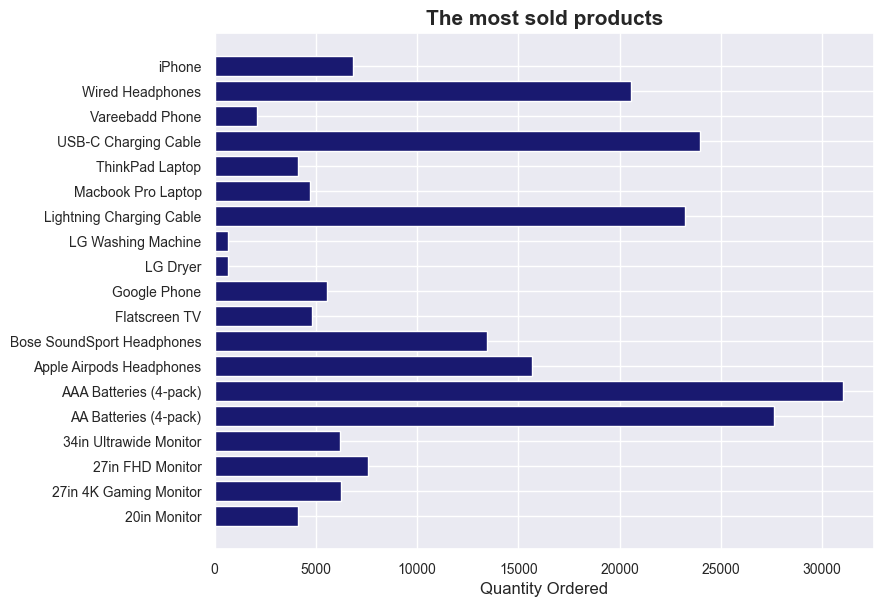

In [782]:
plt.figure(figsize = (9, 6))
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
#plt.bar(keys, quantity_ordered, color ='Navy')
plt.barh(y = keys, #this is an inverted bar chart, so the first argument is the y axis
        width = quantity_ordered , #the second argument shows the x-axis or is the width
        color = "midnightblue")
plt.xticks(fontsize = 10)
plt.yticks( fontsize = 10)
plt.xlabel('Quantity Ordered')
#plt.ylabel('Product')
plt.tight_layout()
plt.title("The most sold products", fontsize = 15, fontweight = "bold", color ="midnightblue")
plt.savefig("most_sold_products.png")
#plt.xticks(keys, rotation=90, size=8)
plt.show()


#### Why these products are the most sold ?

C:\Users\ahmed\AppData\Local\Temp\ipykernel_8348\2354959035.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_8348\2354959035.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


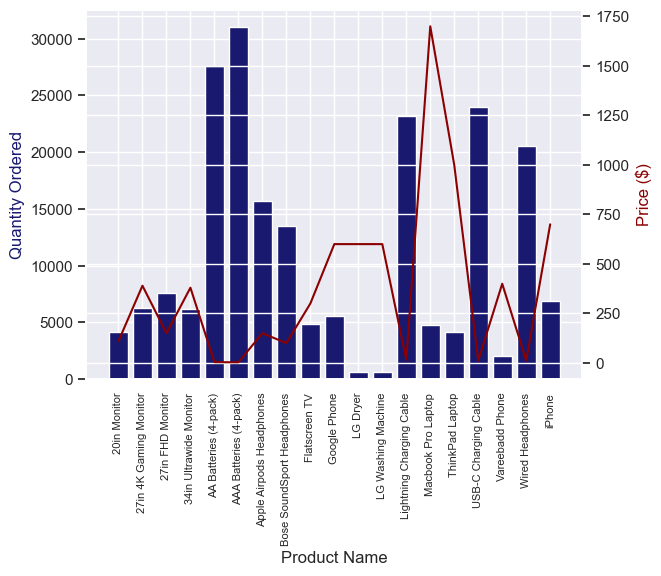

In [799]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='midnightblue')
ax2.plot(keys, prices, color='darkred')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='midnightblue')
ax2.set_ylabel('Price ($)', color='darkred')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()
